## Топовые предикторы


    'fev':'Forced expiratory volume (mL)', #~2000 руб в москве
    'fvc':'Forced Vital Capacity', # или этот вместо fev
    'sbp':'Systolic blood pressure', # ---  
    'bup':'Serum blood urea nitrogen (mg/dL)', # 380 rub gemotest,
    'tcp':'Serum cholesterol (mg/dL)', # 255 rub helix
    'cep':'Serum creatinine (mg/dL)', # 255 rub helix
    'amp':'Serum albumin (g/dL)', # 350 руб helix, 
    'wbc':'White blood cell count', # 650 руб invitro
    'crp':'Serum C-reactive protein (mg/dL)', # 510 rub helix


In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


# Load the dataset
dfm = pd.read_csv("data/nhanes_warner_male.csv")
dff = pd.read_csv("data/nhanes_warner_female.csv")

dfm['gender'] = 1
dff['gender'] = 0
df = pd.concat([dff, dfm])
df = df.reset_index(drop=True)
df.to_csv('data/nhanes_warner.csv')

df.describe()

,seqn,bup,tcp,crp,cep,fvc,amp,wbc,sbp,fev,age,gender
count,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000
mean,28019.571799,14.827106,211.797522,0.504532,1.101825,3608.369705,4.107463,7.205076,128.834886,2771.622707,53.333205,0.467390
std,17059.189248,5.741993,44.093283,0.853384,0.396297,1091.530678,0.357539,2.372782,19.975843,902.049818,16.396736,0.498959
min,4.000000,2.000000,74.000000,0.210000,0.300000,368.000000,2.000000,2.100000,80.000000,104.000000,30.000000,0.000000
25%,12049.500000,11.000000,182.000000,0.210000,0.900000,2847.500000,3.900000,5.700000,114.000000,2138.500000,39.000000,0.000000
50%,33424.000000,14.000000,208.000000,0.210000,1.100000,3531.000000,4.100000,6.850000,125.000000,2729.000000,51.000000,0.000000
75%,43502.500000,17.000000,238.000000,0.500000,1.200000,4328.000000,4.300000,8.300000,140.500000,3361.000000,67.000000,1.000000
max,53616.000000,86.000000,518.000000,25.200001,13.900000,7748.000000,5.700000,71.349998,244.000000,6221.000000,90.000000,1.000000


In [243]:
df

,seqn,bup,tcp,crp,cep,fvc,amp,wbc,sbp,fev,age,gender,y_pred,final_pred
0,4,11,160,0.21,0.7,3536,4.1,12.55,126,3089,32,0,33.733358,41.395454
1,9,14,236,0.21,0.8,3436,4.0,4.95,131,2512,48,0,59.578256,62.071897
2,34,15,216,0.21,0.8,2850,3.9,5.05,100,2331,42,0,47.370677,54.525208
3,48,10,156,1.54,1.0,3375,3.7,8.85,128,2478,56,0,45.276768,60.755715
4,63,14,202,0.44,1.0,2487,3.5,6.60,137,1903,66,0,62.688039,68.551843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10406,53571,15,212,1.20,1.3,4084,3.6,8.70,145,1719,65,1,70.238371,68.438890
10407,53575,19,184,0.21,1.1,3583,3.9,6.25,157,2351,66,1,73.553133,73.819833
10408,53581,13,196,0.21,1.2,4960,4.4,5.55,129,4017,35,1,43.557305,40.528659
10409,53585,15,215,1.60,1.1,3443,4.1,9.55,135,2491,58,1,60.921313,61.162373


In [208]:
print(df.head())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   seqn  bup  tcp   crp  cep   fvc  amp    wbc  sbp   fev  age  gender
0     4   11  160  0.21  0.7  3536  4.1  12.55  126  3089   32       0
1     9   14  236  0.21  0.8  3436  4.0   4.95  131  2512   48       0
2    34   15  216  0.21  0.8  2850  3.9   5.05  100  2331   42       0
3    48   10  156  1.54  1.0  3375  3.7   8.85  128  2478   56       0
4    63   14  202  0.44  1.0  2487  3.5   6.60  137  1903   66       0
               seqn           bup           tcp           crp           cep  \
count  10411.000000  10411.000000  10411.000000  10411.000000  10411.000000   
mean   28019.571799     14.827106    211.797522      0.504532      1.101825   
std    17059.189248      5.741993     44.093283      0.853384      0.396297   
min        4.000000      2.000000     74.000000      0.210000      0.300000   
25%    12049.500000     11.000000    182.000000      0.210000      0.900000   
50%    33424.000000     14.000000    208.000000      0.210000      1.100000   
75%    43502.500000  

In [209]:
df.corr()


,seqn,bup,tcp,crp,cep,fvc,amp,wbc,sbp,fev,age,gender
seqn,1.000000,-0.055079,-0.041952,0.045799,0.002663,-0.064020,-0.271718,0.017101,0.010284,-0.039441,-0.014076,-0.065679
bup,-0.055079,1.000000,0.120844,0.028633,0.516026,-0.082631,-0.007448,0.013741,0.241121,-0.133640,0.409264,0.154948
tcp,-0.041952,0.120844,1.000000,-0.016695,0.031991,-0.137234,0.055181,0.031179,0.220111,-0.153627,0.231190,-0.049984
crp,0.045799,0.028633,-0.016695,1.000000,0.066133,-0.152521,-0.257441,0.187355,0.067008,-0.153286,0.067166,-0.064003
cep,0.002663,0.516026,0.031991,0.066133,1.000000,0.052416,-0.014666,-0.006114,0.169786,0.010745,0.188661,0.286004
fvc,-0.064020,-0.082631,-0.137234,-0.152521,0.052416,1.000000,0.296559,-0.046215,-0.276479,0.932179,-0.458901,0.588471
amp,-0.271718,-0.007448,0.055181,-0.257441,-0.014666,0.296559,1.000000,-0.017054,-0.071989,0.300317,-0.168750,0.224425
wbc,0.017101,0.013741,0.031179,0.187355,-0.006114,-0.046215,-0.017054,1.000000,0.047319,-0.068017,-0.002617,-0.001931
sbp,0.010284,0.241121,0.220111,0.067008,0.169786,-0.276479,-0.071989,0.047319,1.000000,-0.336597,0.546543,0.080519
fev,-0.039441,-0.133640,-0.153627,-0.153286,0.010745,0.932179,0.300317,-0.068017,-0.336597,1.000000,-0.580771,0.484740


array([[<Axes: title={'center': 'seqn'}>,
        <Axes: title={'center': 'bup'}>, <Axes: title={'center': 'tcp'}>],
       [<Axes: title={'center': 'crp'}>, <Axes: title={'center': 'cep'}>,
        <Axes: title={'center': 'fvc'}>],
       [<Axes: title={'center': 'amp'}>, <Axes: title={'center': 'wbc'}>,
        <Axes: title={'center': 'sbp'}>],
       [<Axes: title={'center': 'fev'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>]], dtype=object)

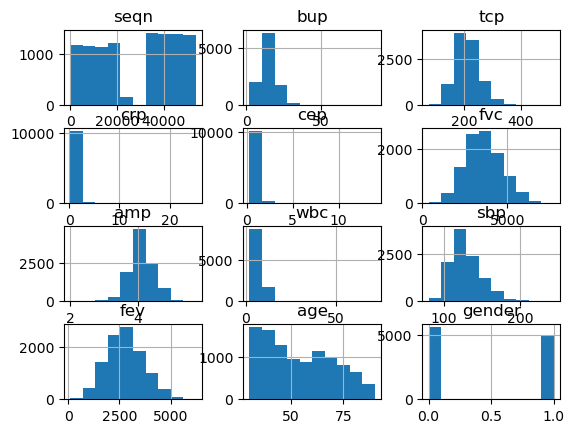

In [210]:
df.hist()  # Histograms for numerical features


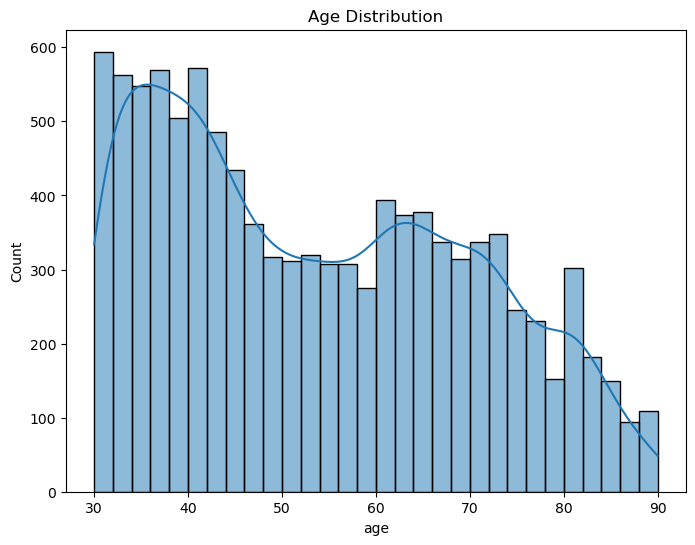

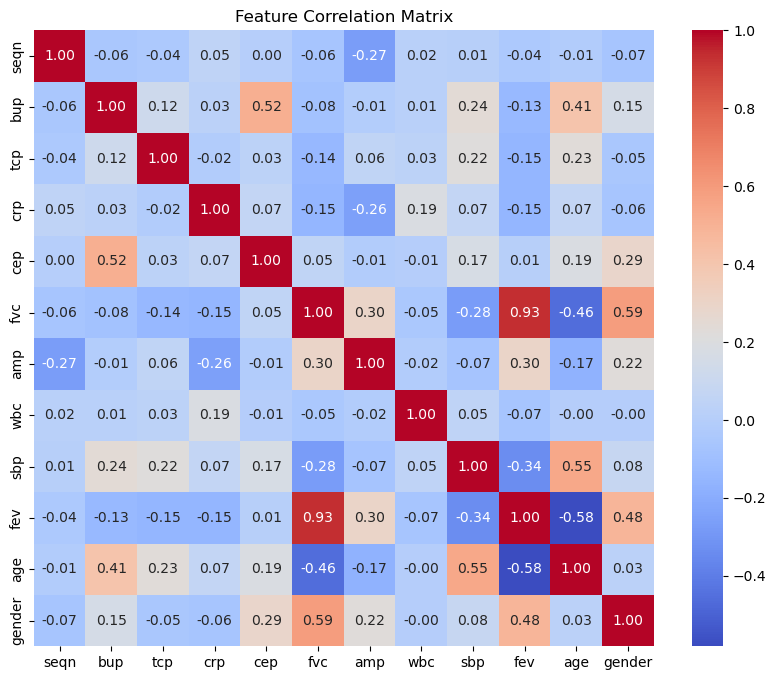

In [211]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


Model saved for fold 1: models/model_fold_1.joblib
Model saved for fold 2: models/model_fold_2.joblib
Model saved for fold 3: models/model_fold_3.joblib
Model saved for fold 4: models/model_fold_4.joblib
Model saved for fold 5: models/model_fold_5.joblib
MAE 8.20457488035278 R2 0.6018573321661407


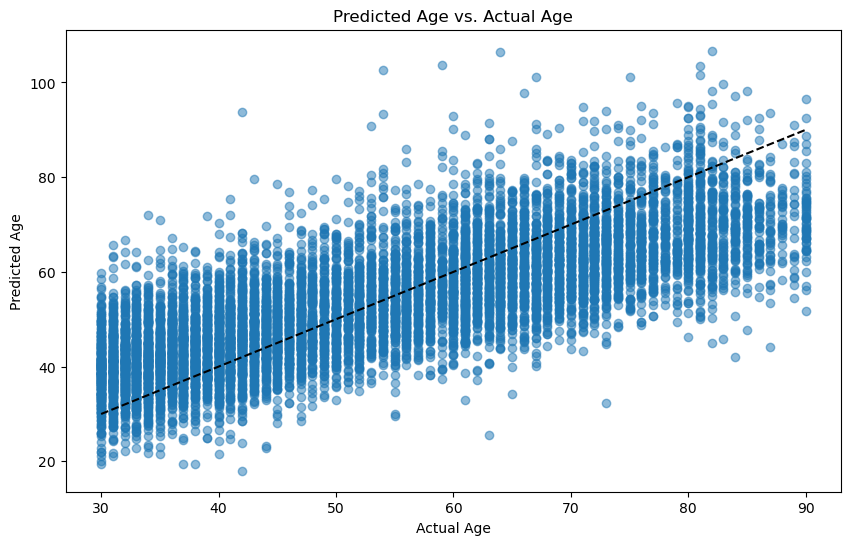

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from joblib import dump, load


def train_and_save_models(model, df, n_splits=5):
    models_saved = []
    use_cols = ['seqn', 'bup', 'tcp', 'crp', 'cep', 'fvc', 'amp', 'wbc', 'sbp', 'fev', 'gender']
    X = df[use_cols]
    y = df["age"]
    res_df = pd.DataFrame(columns=["split", "mean_absolute_error", "r2_score"])

    kf = KFold(n_splits=n_splits)
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df.loc[df.iloc[test_index].index, 'y_pred'] = y_pred.tolist()

        # Save the model for this fold
        model_filename = f'models/model_fold_{fold}.joblib'
        dump(model, model_filename)
        models_saved.append(model_filename)
        print(f'Model saved for fold {fold}: {model_filename}')

    return df, models_saved

# Example of calling the function with a hypothetical model and DataFrame
# model = YourModelHere()
# df_modified = train_with_model(model, df)
df['y_pred'] = None
df, models_saved = train_and_save_models(LinearRegression(), df)
mae = mean_absolute_error(df['age'], df['y_pred'])
r2 = r2_score(df['age'], df['y_pred'])

print('MAE', mae, 'R2', r2)

# Plot y_pred against age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['y_pred'], alpha=0.5)
plt.title('Predicted Age vs. Actual Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.plot([df['age'].min(), df['age'].max()], [df['age'].min(), df['age'].max()], 'k--') # Diagonal line
plt.show()

Model saved for fold 1: models/model_fold_1.joblib
Model saved for fold 2: models/model_fold_2.joblib
Model saved for fold 3: models/model_fold_3.joblib
Model saved for fold 4: models/model_fold_4.joblib
Model saved for fold 5: models/model_fold_5.joblib
MAE 7.482139177416558 R2 0.6571822620942609


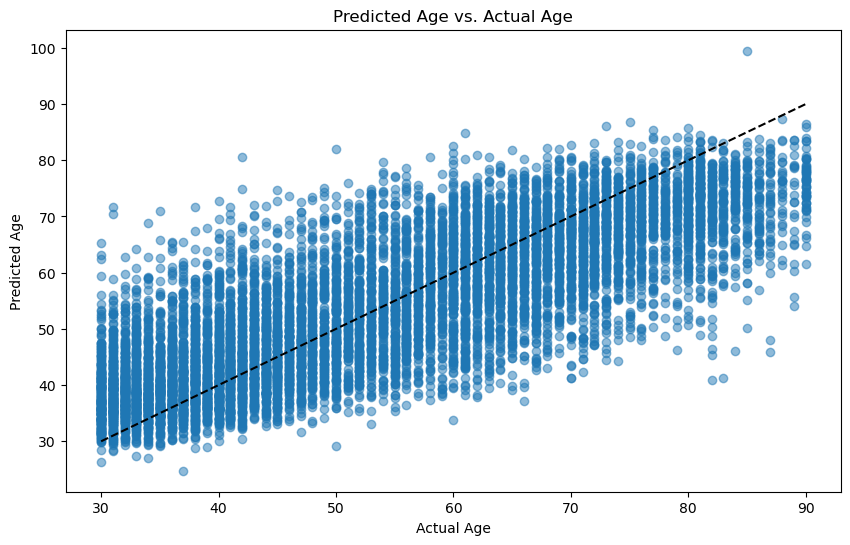

In [217]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(silent=True, random_state=42, max_depth=5)
df, models_saved = train_and_save_models(cb_model, df)
mae = mean_absolute_error(df['age'], df['y_pred'])
r2 = r2_score(df['age'], df['y_pred'])

print('MAE', mae, 'R2', r2)
# Plot y_pred against age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['y_pred'], alpha=0.5)
plt.title('Predicted Age vs. Actual Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.plot([df['age'].min(), df['age'].max()], [df['age'].min(), df['age'].max()], 'k--') # Diagonal line
plt.show()

In [237]:
cb_model = load(models_saved[0])
cb_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,fev,35.268536
1,sbp,17.216960
2,bup,11.890814
3,gender,7.776235
4,fvc,6.131406
5,tcp,5.001024
6,amp,4.160921
7,seqn,3.563592
8,cep,3.454024
9,wbc,3.332126


## get baseline scores

In [227]:
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming y is already defined from the earlier steps

# Calculate the mean of the target variable
y_mean = df['age'].mean()

# Create an array of mean values that has the same shape as y for baseline prediction
y_pred_baseline = [y_mean] * len(df['age'])

# Calculate MAE and R^2 for the baseline
mae_baseline = mean_absolute_error(df['age'], y_pred_baseline)
r2_baseline = r2_score(df['age'], y_pred_baseline)

mae_baseline, r2_baseline


(14.282896736281748, 0.0)

# Inference

In [233]:
from joblib import load

def predict_and_average(X, models_saved):
    predictions = 0
    
    for model_filename in models_saved:
        model = load(model_filename)
        pred = model.predict(X)
        predictions += pred
    
    predictions /= len(models_saved)
    
    return predictions

final_predictions = predict_and_average(df.loc[0], models_saved)
final_predictions

41.39545355564186

In [234]:
for i in range(df.shape[0]):
    final_pred = predict_and_average(df.loc[i], models_saved)
    df.loc[i, 'final_pred'] = final_pred
    
df

,seqn,bup,tcp,crp,cep,fvc,amp,wbc,sbp,fev,age,gender,y_pred,final_pred
0,4,11,160,0.21,0.7,3536,4.1,12.55,126,3089,32,0,33.733358,41.395454
1,9,14,236,0.21,0.8,3436,4.0,4.95,131,2512,48,0,59.578256,62.071897
2,34,15,216,0.21,0.8,2850,3.9,5.05,100,2331,42,0,47.370677,54.525208
3,48,10,156,1.54,1.0,3375,3.7,8.85,128,2478,56,0,45.276768,60.755715
4,63,14,202,0.44,1.0,2487,3.5,6.60,137,1903,66,0,62.688039,68.551843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10406,53571,15,212,1.20,1.3,4084,3.6,8.70,145,1719,65,1,70.238371,68.438890
10407,53575,19,184,0.21,1.1,3583,3.9,6.25,157,2351,66,1,73.553133,73.819833
10408,53581,13,196,0.21,1.2,4960,4.4,5.55,129,4017,35,1,43.557305,40.528659
10409,53585,15,215,1.60,1.1,3443,4.1,9.55,135,2491,58,1,60.921313,61.162373


In [235]:
mae_final_pred = mean_absolute_error(df['age'], df['final_pred'])
r2_final_pred = r2_score(df['age'], df['final_pred'])
mae_final_pred, r2_final_pred

(7.67135885251093, 0.6543734906699957)

In [242]:
m = load(models_saved[0])
m.feature_names_


['seqn',
 'bup',
 'tcp',
 'crp',
 'cep',
 'fvc',
 'amp',
 'wbc',
 'sbp',
 'fev',
 'gender']

In [244]:
import numpy as np

# Функция, которую мы хотим минимизировать
def func(x):
    return x**3 - x**2 + 10

# Производная функции
def derivative(x):
    return 3*x**2 - 2*x

# Градиентный спуск
def gradient_descent(starting_point, learning_rate, n_iterations, tolerance):
    x = starting_point
    for _ in range(n_iterations):
        grad = derivative(x)
        if abs(grad) <= tolerance:  # Если градиент достаточно мал, останавливаемся
            break
        x = x - learning_rate * grad
    return x

# Начальные параметры
starting_point = 0.0  # Начальная точка
learning_rate = 0.01  # Скорость обучения
n_iterations = 10000  # Максимальное количество итераций
tolerance = 1e-6  # Допуск для остановки алгоритма

# Поиск корня
root = gradient_descent(starting_point, learning_rate, n_iterations, tolerance)

root, func(root)


(0.0, 10.0)